In [3]:
import numpy as np
import pandas as pd
from time import time
from sklearn import metrics
from collections import defaultdict
import matplotlib.pyplot as plt
import glob


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics.cluster import contingency_matrix

## Import libraries
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords' )

import string
from string import punctuation
import matplotlib.pyplot as plt

In [64]:
# read csv file

import json

file1 = open('tweets_#gohawks.txt', 'r')
lines = file1.readlines()

for line in lines:
    json_object = json.loads(line)
    break
json_object

{'firstpost_date': 1423304269,
 'title': "The ultimate broken hearted hangover week from hell (#SB49) is almost over. Listening to the blues still. We'll get'em in #SB50 #GOHAWKS",
 'url': 'http://twitter.com/carabear133/status/564005099874181122',
 'tweet': {'contributors': None,
  'truncated': False,
  'text': "The ultimate broken hearted hangover week from hell (#SB49) is almost over. Listening to the blues still. We'll get'em in #SB50 #GOHAWKS",
  'in_reply_to_status_id': None,
  'id': 564005099874181122,
  'favorite_count': 0,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'retweeted': False,
  'coordinates': None,
  'timestamp_ms': '1423304269175',
  'entities': {'symbols': [],
   'user_mentions': [],
   'trends': [],
   'hashtags': [{'indices': [53, 58], 'text': 'SB49'},
    {'indices': [122, 127], 'text': 'SB50'},
    {'indices': [128, 136], 'text': 'GOHAWKS'}],
   'urls': []},
  'in_reply_to_screen_name': None,
  'in_reply_to_user_id': None

In [95]:
df = { 'tweet': [],
         'retweets': [],
         'time': [],
            'timestamp': [],
         'followers': []}

In [96]:
import pytz
import datetime

pst_tz = pytz.timezone('America/Los_Angeles')



In [97]:

file1 = open('tweets_#gohawks.txt', 'r')
lines = file1.readlines()

for line in lines:
    json_object = json.loads(line)
    df['tweet'].append(json_object['title'])
    df['retweets'].append(json_object['metrics']['citations']['total'])
    df['time'].append(json_object['citation_date'])
    df['timestamp'].append(datetime.datetime.fromtimestamp(json_object['citation_date'], pst_tz))
    df['followers'].append(json_object['author']['followers'])

In [98]:
df = pd.DataFrame(df)

In [100]:
df.sort_values(by='timestamp')

,tweet,retweets,time,timestamp,followers
205,“@TheDA53: “@nathanSD8: @TheDA53 broncos?! 😢 #...,1,1421222681,2015-01-14 00:04:41-08:00,570.0
206,Enganchado a @ATLHawks \nQué temporadón! Hoy t...,2,1421222699,2015-01-14 00:04:59-08:00,85.0
203,Dr. Jim Kurtz &amp; I before Seahawks vs Panth...,3,1421222750,2015-01-14 00:05:50-08:00,120.0
207,At http://t.co/Vd0RWOeAed -- #beatthepackers #...,1,1421222961,2015-01-14 00:09:21-08:00,1175.0
208,@Trapstar_DJ the more the merrier! #GoHawks,1,1421223140,2015-01-14 00:12:20-08:00,419.0
...,...,...,...,...,...
169117,How long to you think that it will be until we...,1,1423290285,2015-02-06 22:24:45-08:00,120.0
169118,"#Seahawks all day, everyday!!! #beastmode #LOB...",3,1423291665,2015-02-06 22:47:45-08:00,47.0
169119,Interview With the Seattle Seahawks Superbowl ...,1,1423295642,2015-02-06 23:54:02-08:00,1496.0
169120,If you love Russell Wilson and want to know mo...,1,1423295796,2015-02-06 23:56:36-08:00,120.0


In [102]:
hashtags = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

In [110]:
def tweetstats(hashtag):

    file_name = 'tweets_#' + hashtag + '.txt'
    retweets   = []
    timestamp   = []
    followers  = []

    lines = open(file_name, 'r', encoding='utf8')

    for i, line in enumerate(lines):
        tweet = json.loads(line)
        timestamp.append(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz))
        retweets.append(tweet['metrics']['citations']['total'])
        followers.append(tweet['author']['followers'])
        

    df = pd.DataFrame(timestamp, columns=['time']).set_index('time')
    tweets_by_hour = df.groupby(pd.Grouper(freq='60Min'))
    count_by_hour = [len(val) for key, val in tweets_by_hour]
    total_hours = len(tweets_by_hour)

    print("Avg number of tweets per hour", len(timestamp) / total_hours)
    print("Avg number of retweets - ", np.mean(retweets))
    print("Avg number of followers - ", np.mean(followers))

    if hashtag in ['gohawks', 'gopatriots', 'nfl', 'patriots', 'sb49', 'superbowl']:         
        plt.figure(figsize=(15,10))
        plt.grid(zorder=0)
        plt.bar(range(len(tweets_by_hour.groups.keys())), count_by_hour,width=1,color = 'r',align='center')
        plt.xlabel('Hour',fontsize=20)
        plt.ylabel('Number of tweets',fontsize=20)
        plt.title('Number of tweets per hour' + ' ' + hashtag,fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()


 Printing for  gohawks
Avg number of tweets per hour 292.09326424870466
Avg number of retweets -  2.0132093991319877
Avg number of followers -  2217.9237355281984


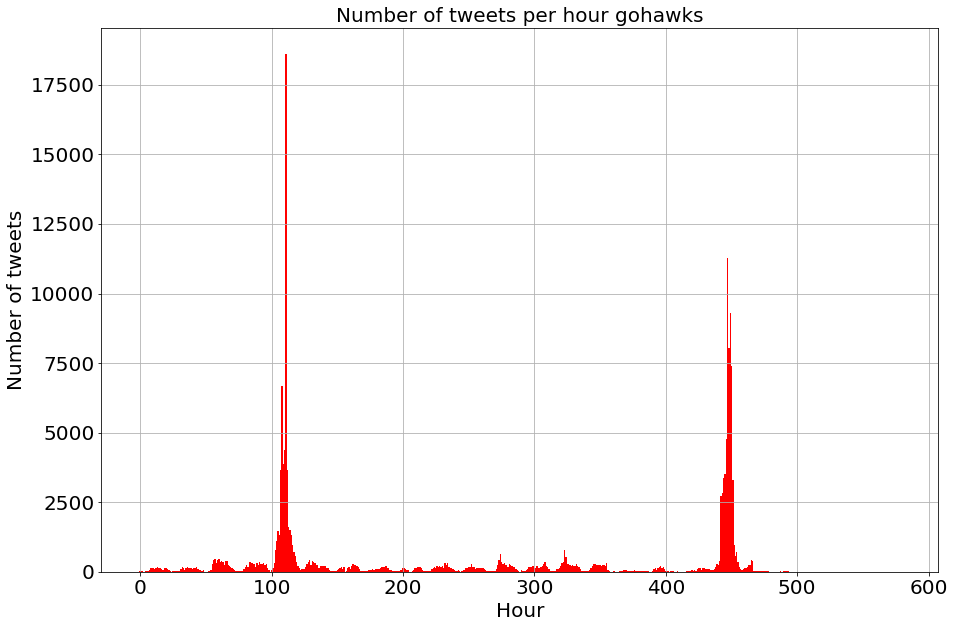


 Printing for  gopatriots
Avg number of tweets per hour 40.888695652173915
Avg number of retweets -  1.4081919101697078
Avg number of followers -  1427.2526051635405


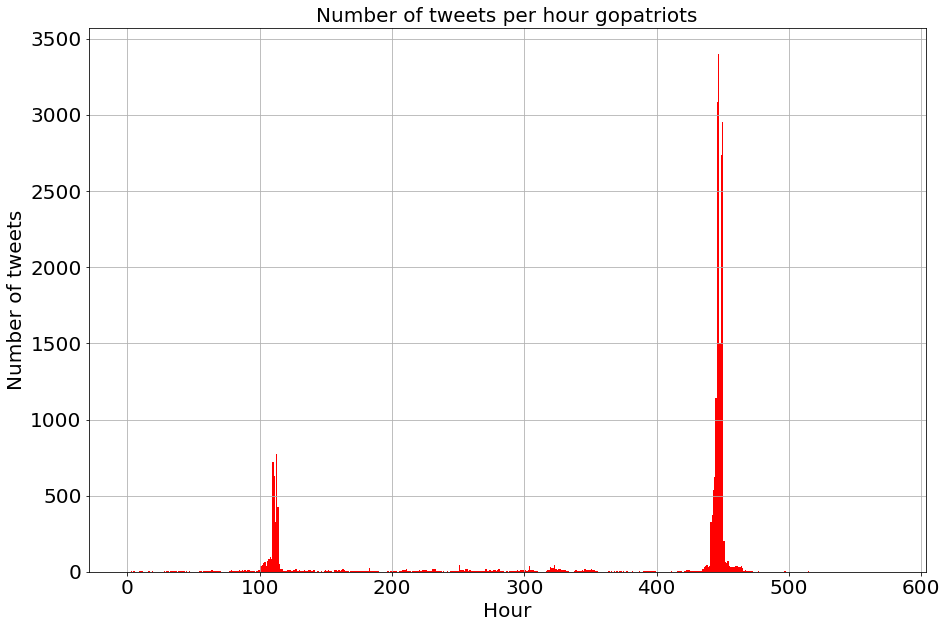


 Printing for  nfl
Avg number of tweets per hour 396.97103918228277
Avg number of retweets -  1.5344602655543254
Avg number of followers -  4662.37544523693


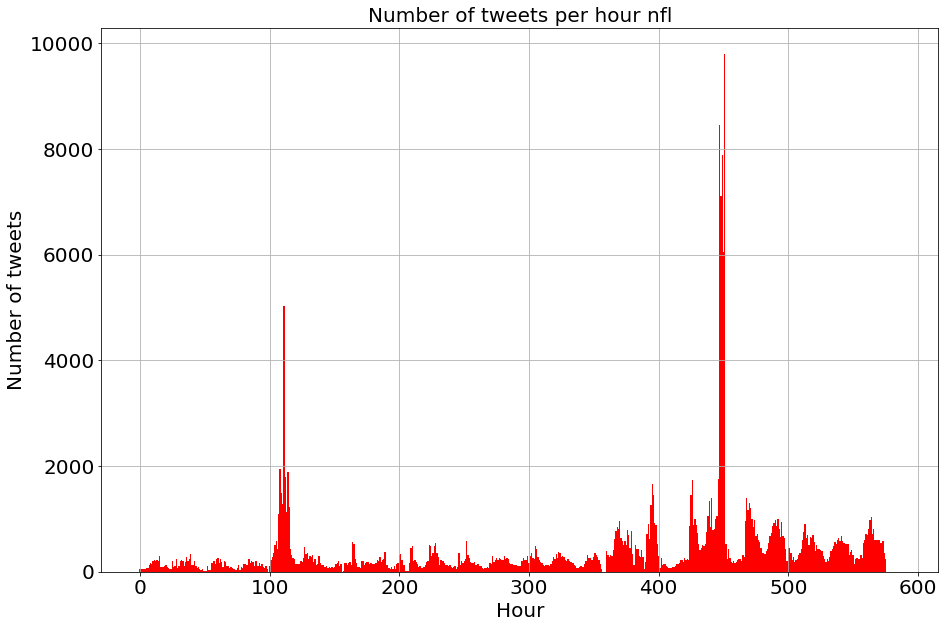


 Printing for  patriots
Avg number of tweets per hour 750.6320272572402
Avg number of retweets -  1.7852871288476946
Avg number of followers -  3280.4635616550277


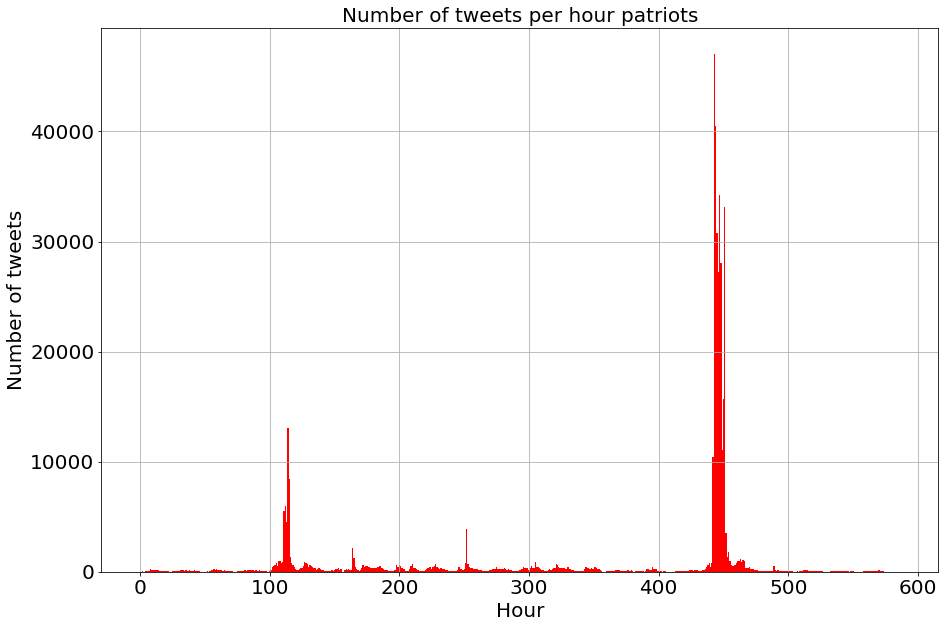


 Printing for  sb49
Avg number of tweets per hour 1275.5557461406518
Avg number of retweets -  2.52713444111402
Avg number of followers -  10374.160292019487


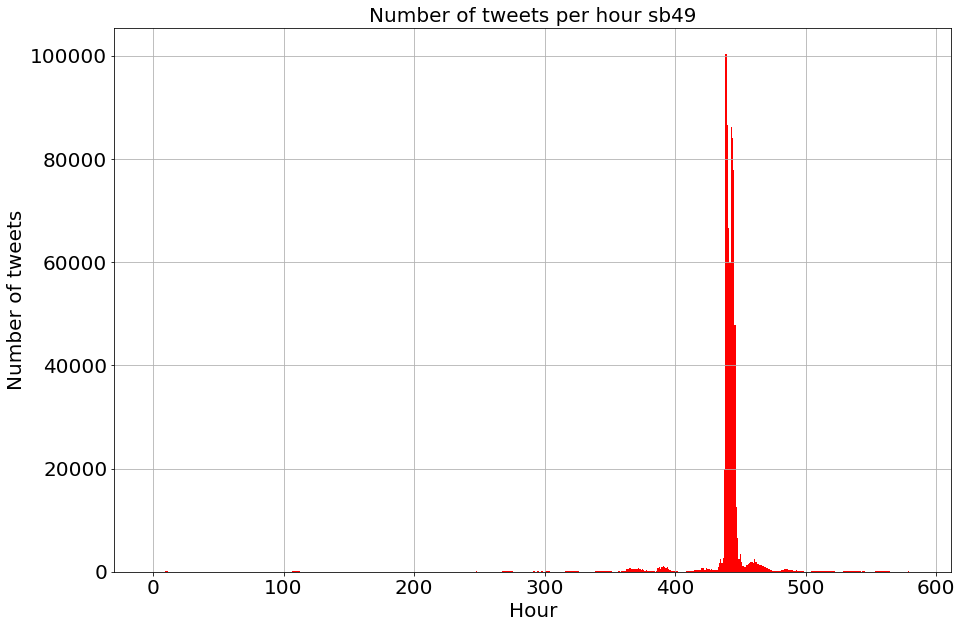


 Printing for  superbowl
Avg number of tweets per hour 2067.824531516184
Avg number of retweets -  2.3911895819207736
Avg number of followers -  8814.96799424623


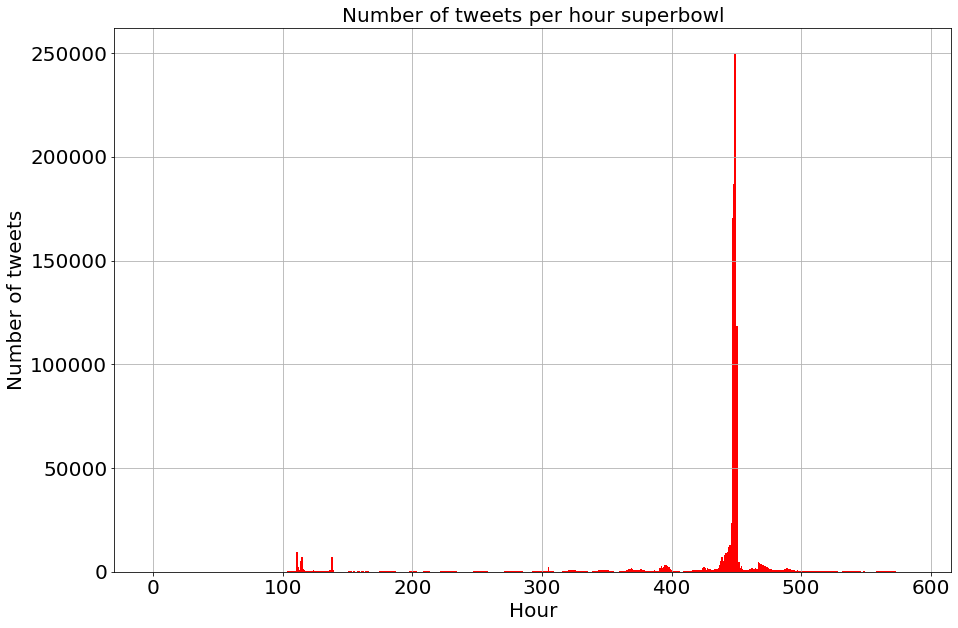

In [111]:
for tag in hashtags:
    print("\n Printing for ", tag)
    tweetstats(tag)